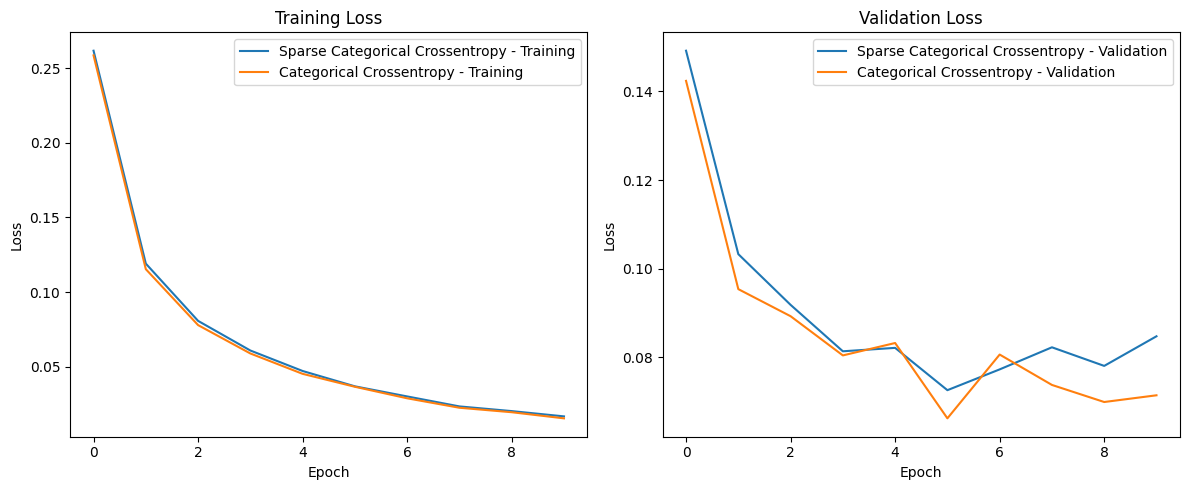

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

tf.keras.utils.set_random_seed(2055)

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Prepare labels for categorical_crossentropy (one-hot encoding)
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)


# Define a simple neural network architecture
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model


# Training with sparse_categorical_crossentropy
model_sparse = create_model()
model_sparse.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
history_sparse = model_sparse.fit(train_images, train_labels, epochs=10,
                                  validation_data=(test_images, test_labels),
                                  verbose=0)

# Training with categorical_crossentropy
model_cat = create_model()
model_cat.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
history_cat = model_cat.fit(train_images, train_labels_cat, epochs=10,
                            validation_data=(test_images, test_labels_cat),
                            verbose=0)

# Plotting the results
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history_sparse.history['loss'], label='Sparse Categorical Crossentropy - Training')
plt.plot(history_cat.history['loss'], label='Categorical Crossentropy - Training')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(history_sparse.history['val_loss'], label='Sparse Categorical Crossentropy - Validation')
plt.plot(history_cat.history['val_loss'], label='Categorical Crossentropy - Validation')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
